# CA-06 Customer Segmentation using K-Means Clustering

In [44]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the dataset and display the first few rows
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA06/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# Check for null values
df.isna().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [7]:
# Check for duplicate values
df.duplicated().sum()

0

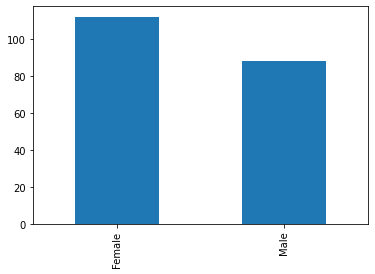

In [8]:
# visualize the distribution of a categorical column
df['Genre'].value_counts().plot(kind='bar')
plt.show()

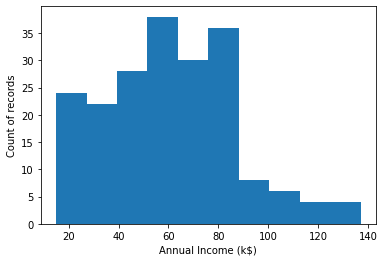

In [26]:
# visualize the distribution of a numeric column
plt.hist(df['Annual Income (k$)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count of records')
plt.show()

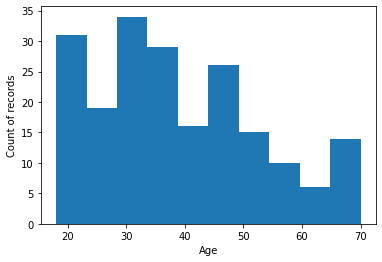

In [25]:
# visualize the distribution of a numeric column
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count of records')
plt.show()

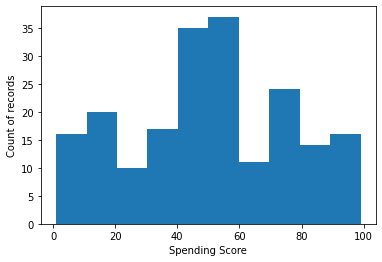

In [24]:
# visualize the distribution of a numeric column
plt.hist(df['Spending Score (1-100)'])
plt.xlabel('Spending Score')
plt.ylabel('Count of records')
plt.show()

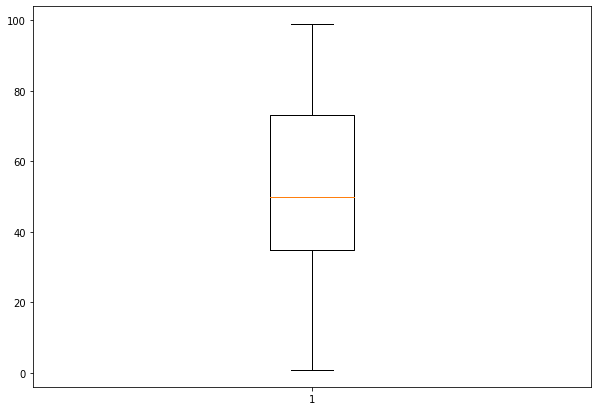

In [12]:
fig = plt.figure(figsize = (10,7))

#Creating plot
plt.boxplot(df['Spending Score (1-100)'])

#show plot
plt.show()

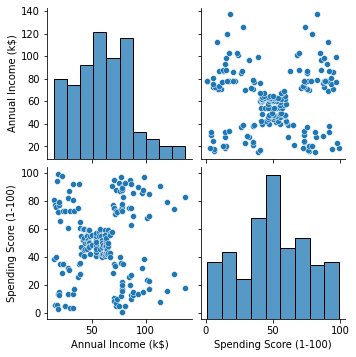

In [13]:
# create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['Annual Income (k$)', 'Spending Score (1-100)'])
plt.show()

### Pre-Processing

**Handle missing values,
encoding,
IDness,
handle outliers,
normalization and scaling,
stability and health checks**

In [16]:
# Drop rows/columns
# Handle missing values
# Handle outliers

In [46]:
# Convert categorical features to binary using pd.get_dummies
categorical_features = ['Genre']
for col in categorical_features:
    dummies = pd.get_dummies(df[col], prefix=col)
    # Create new df
    data = pd.concat([df,dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [49]:
# Use StandardScaler to standardize the values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[["Annual Income (k$)", "Spending Score (1-100)"]])

# Create new DataFrame with selected features
data_features = pd.DataFrame(scaled_features, columns = ["Annual Income", "Spending Score"])
data_features.head()

,Annual Income,Spending Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


### K-Means Clustering

In [50]:
# Import KMeans class from sklearn.cluster module and silhouette_score form sklearn.metrics module
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

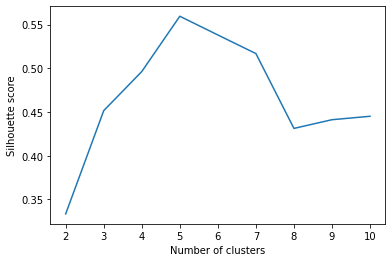

Optimal number of clusters: 5


In [52]:
# Define the range of cluster numbers to test
range_n_clusters = list(range(2, 11))

# Initialize an empty list to store the silhouette scores for each cluster number
silhouette_scores = []

# Loop over each cluster number and calculate the silhouette score
for n_clusters in range_n_clusters:
    # Initialize the KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data
    cluster_labels = kmeans.fit_predict(data_features)
    
    # Calculate the silhouette score for this clustering result
    score = silhouette_score(data_features, cluster_labels)
    
    # Append the score to the list of scores
    silhouette_scores.append(score)

# Plot the silhouette scores for each cluster number
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

# Choose the optimal number of clusters as the one with the highest silhouette score
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters:", optimal_n_clusters)

In [56]:
# Train KMeans model with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(data_features)

KMeans(n_clusters=5, random_state=42)

In [68]:
# Obtain cluster assignments for each data point
cluster_assignments = kmeans.predict(data_features)

### Visualize and Analyze the Clusters

In [80]:
# Find centroids
kmeans.cluster_centers_

array([[0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

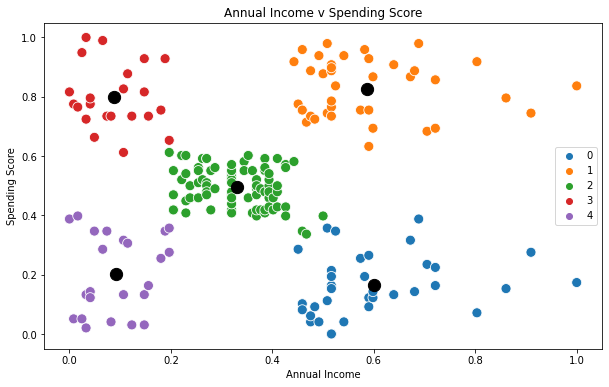

In [88]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x="Annual Income", y="Spending Score", data=data_features, hue=cluster_assignments, palette='tab10', s=100)
plt.scatter(0.6, 0.16443149, s=150, c='k', marker='o')
plt.scatter(0.58638083, 0.82783883, s=150, c='k', marker='o')
plt.scatter(0.33029751, 0.49508692, s=150, c='k', marker='o')
plt.scatter(0.08792846, 0.79962894, s=150, c='k', marker='o')
plt.scatter(0.09265859, 0.20319432, s=150, c='k', marker='o')
plt.title("Annual Income v Spending Score")
plt.show()

**Interpret clusters, describe each one:**
The silhouette scores indicated that the optimal number of clusters are 5 clusters, so therefore, I have plotted 5 clusters on the graph above. 
- Cluster 0: [0.6, 0.16443149], has a high annual income and low spending score
- Cluster 1: [0.58638083, 0.82783883], has a high annual income and high spending score
- Cluster 2: [0.33029751, 0.49508692], has an average annual income and average spending score
- Cluster 3: [0.08792846, 0.79962894], has a low annual income and high spending score
- Cluster 4: [0.09265859, 0.20319432], has a low annual income and low spending score

In [8]:
# Optional: perform the same analysis with different sets of features and compare the results

### Report

**Describe the dataset and its attributes:**
This dataset had CustomerID, Genre (which was meant to say Gender), Age, Annual Income (k$), and Spending Score (1-100). Gender was the only categorical column, the others were numerical. There were 200 records and 5 columns, no null or duplicated values, and no outliers.

**Detail the steps taken for data preprocessing, feature selection, and scaling:**
For data preprocessing, I used the MinMaxScaler to standardize the Annual Income and Spending Score values. The two attributes we wanted to measure were Annual Income and Spending Score, so I created a new dataframe with only those two columns in it. Since there were no missing values, duplicate values, or outliers, I did not need to take steps to remove rows or columns. The data was fairly clean on its own. 

**Explain the process of determining the optimal number of clusters:**
First, I had to import KMeans and silhouette score from various sklearn modules. Then I defined the range of cluster numbers to test (I chose 2-11), initialized an empty list called silhouette_scores to store the silhouette scores for each cluster number, and looped over each cluster number and calculated the silhouette score. Within the loop, I initialized the kmeans model with the current number of clusters, fit the model to the data, calculated the silhouette score for this clustering result, and appended the score to the list of scores. Finally, I plotted the silhouette scores for each cluster number and chose the optimal number of clusters as the one with the highest silhouette score.

**Describe the clusters and their characteristics:**
There are 5 clusters, each one representing the relationship between annual income and spending scores. Cluster 0 has a high annual income and low spending score, Cluster 1 has a high annual income and high spending score, Cluster 2 has an average annual income and average spending score, Cluster 3 has a low annual income and high spending score, and Cluster 4 has a low annual income and high spending score.

**Discuss any insights or recommendations based on your analysis:**
I recommend that the stores within the mall use the information gathered from kmeans clustering to appeal to their customers. 
- Cluster 0: high income and low spending, customers within this cluster would respond best to products that have a strong brand and are reliable. These customers with high incomes keep coming back to the products with low prices because it has worked well for them in the past and/or is spoken highly about by others. Marketers are advised to establish strong brands for products and offer customer loyalty opportunities to keep these customers coming back for more.
- Cluster 1: high income and high spending, customers within this cluster have a lot of money to spend and go for high-end products. Marketers should focus on the quality of the product and its exclusivity.
- Cluster 2: average income and average spending, customers within this cluster would respond best to a mix of affordable as well as high quality products. A marketing strategy could include increasing customer loyalty to improve sales from this group.
- Cluster 3: low income and high spending, these customers would respond best to high quality products that provide more "bang for their buck". Salespeople should use tailored ads for this type of customer in order to draw them in.
- Cluster 4: low income and low spending, these customers do not have a lot of money to spend and consequentially do not spend a lot of money at the mall. They would respond best to affordable products and discounted items, so marketing should focus on the low prices or discount opportunities versus the quality of the products themselves.